# Advanced interactive barplot demo 


In [4]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [5]:
% matplotlib notebook

In [6]:
mean_val = df.mean(axis=1).values
std_val  = df.std(axis=1).values

In [7]:
# confidence interval, 1.96 comes from the fact we want 95% confidence interval (z* value)
# http://www.dummies.com/education/math/statistics/how-to-calculate-a-confidence-interval-for-a-population-mean-when-you-know-its-standard-deviation/
confd_val = 1.96 * (std_val / math.sqrt(len(df.columns)))
confd_val

array([6508.89796997, 3192.25431369, 4553.90228709, 2263.85174431])

# Easiest option:
Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.

<IPython.core.display.Javascript object>


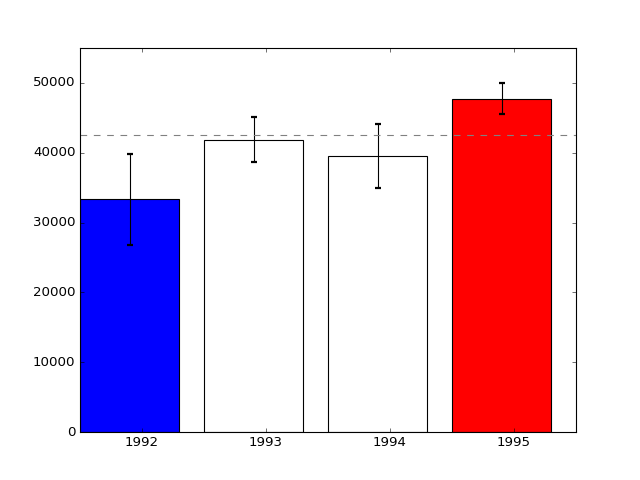

In [8]:
import matplotlib.ticker as ticker

cutoff = 42500

def colorForBar(mean, cutoff, confidence):
    if (mean - confidence) <= cutoff and (mean + confidence) >= cutoff:
        return "white"
    
    if mean < cutoff:
        return "blue"
    
    if mean > cutoff:
        return "red"

colors=[colorForBar(mean_val[0], cutoff, confd_val[0]),
        colorForBar(mean_val[1], cutoff, confd_val[1]), 
        colorForBar(mean_val[2], cutoff, confd_val[2]), 
        colorForBar(mean_val[3], cutoff, confd_val[3])]

x_ndx=np.arange(len(mean_val))

fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.set_xlim(0,4)
ax1.set_ylim(0,55000)
x_sticks=['1992','1993','1994','1995']

ax1.bar(x_ndx, mean_val,color=colors, tick_label=x_sticks, yerr=confd_val,
       error_kw=dict(ecolor='black', lw=1, capsize=2.5, capthick=2))

majors = [0.5,1.5,2.5, 3.5]
ax1.xaxis.set_major_locator(ticker.FixedLocator(majors))

ax1.axhline(y=cutoff, color='grey', linestyle='--')



# Harder option:

Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

<IPython.core.display.Javascript object>


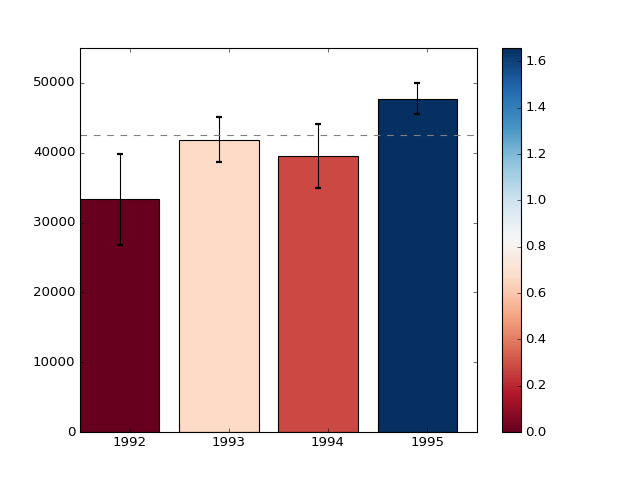

In [9]:
from matplotlib import cm
from matplotlib.cm import ScalarMappable

# prepare data
mean_val = df.mean(axis=1).values
std_val  = df.std(axis=1).values
confd_val = 1.96 * (std_val / math.sqrt(len(df.columns)))

# fraction of data that is above the cutoff line
#def Norm(data):
#    return (data - np.min(data)) / (np.max(data) - np.min(data))


up_bound = mean_val + confd_val
lower_bound = mean_val - confd_val
confd_length = confd_val*2
cutoff = 42500
#cutoff = 50000
fraction = (up_bound - cutoff)/confd_length
x_sticks=['1992','1993','1994','1995']

colors = cm.RdBu(fraction)

my_cmap = plt.cm.get_cmap('RdBu')

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.bar(x_ndx,mean_val,color=colors,tick_label=x_sticks, yerr=confd_val,
       error_kw=dict(ecolor='black', lw=1, capsize=2.5, capthick=2))

ax1.axhline(y=cutoff, color='grey', linestyle='--')

ax1.set_xlim(0,4)
ax1.set_ylim(0,55000)

majors = [0.5,1.5,2.5, 3.5]
ax1.xaxis.set_major_locator(ticker.FixedLocator(majors))

sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(fraction)))
sm.set_array([])
plt.colorbar(sm)

# Even Harder option: 
Add interactivity to the above, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.

<IPython.core.display.Javascript object>


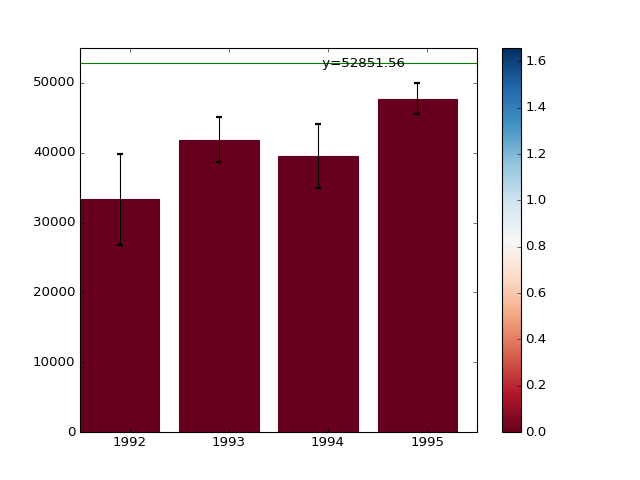

7

In [11]:
class Cursor(object):
    
    def __init__(self, ax, mean_val, confd_val, barlist):
 
        self.ax = ax
        self.mean_val = mean_val
        self.confd_val = confd_val
        self.barlist = barlist
        self.lx = ax.axhline(color='green')  # the horiz line

        # text location in axes coords
        self.txt = ax.text(0.6, 0.95, '', transform=ax.transAxes)
        
    def Norm(self, data):
        return (data - np.min(data)) / (np.max(data) - np.min(data))

    def mouse_move(self, event):
        if not event.inaxes:
            return
        
        x, y = event.xdata, event.ydata
        # update the line positions
        self.lx.set_ydata(y)
        
        up_bound = self.mean_val + self.confd_val
        confd_length = self.confd_val*2
        fraction = (up_bound - y)/confd_length
        colors = cm.RdBu(fraction)
        
        for ndx in range(4):
            self.barlist[ndx].set_color(colors[ndx])

        self.txt.set_text(str(colors))
        self.txt.set_text(' y=%1.2f' % (y))

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.bar(x_ndx,mean_val,tick_label=x_sticks, yerr=confd_val,
                    error_kw=dict(ecolor='black', lw=1, capsize=2.5, capthick=2))

my_cmap = plt.cm.get_cmap('RdBu')

# get four rectangle artists
barlist = ax1.get_children()[1:5]

sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(fraction)))
sm.set_array([])
plt.colorbar(sm)

ax1.set_xlim(0,4)
ax1.set_ylim(0,55000)
majors = [0.5,1.5,2.5, 3.5]
ax1.xaxis.set_major_locator(ticker.FixedLocator(majors))

cursor = Cursor(ax1, mean_val, confd_val,barlist)
plt.connect('motion_notify_event', cursor.mouse_move)



